In [1]:
import sys
import argparse

import matplotlib.pyplot as plt
import pickle

import numpy as np
import pandas as pd

import glob

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [3]:
PATH_data = '../results/test_aug_vs_noaug/'

In [4]:
samples_path = glob.glob(f'{PATH_data}/*')

In [17]:
# res_dict = {}
c = 0

labels = []
x_pos = []

x_pos1 = []
y_roc_norm = []
y_pr_norm = []
dots_roc_norm = []
dots_pr_norm = []

x_pos2 = []
y_roc_no_aug = []
y_pr_no_aug = []
dots_roc_no_aug = []
dots_pr_no_aug = []


prop = []

for sample in samples_path:
    
    x_pos.append(c)
    x_pos1.append(c+0.2)
    x_pos2.append(c-0.2)
    
    
    tissue_name = sample.split('/')[-1]
    labels.append(tissue_name)
#     res_dict[tissue_name]=[[],[]]

    sub_samples_path = glob.glob(f'{sample}/*')
    print()
    print (tissue_name)
    
    for sub_folder in sub_samples_path:
        
        sample_name = sub_folder.split('/')[-1]
        df_metrics = pd.read_csv(f'{sub_folder}/results/{sample_name}_metrics.csv', index_col=0)
#         print (df_metrics)
#         print (sample_name)
        if 'no_agu' in sample_name:
            y_pr_no_aug.append(df_metrics.loc['all','auPR'])
            dots_pr_no_aug.append(list(df_metrics.iloc[0:5,3]))
            y_roc_no_aug.append(df_metrics.loc['all','auROC'])
            dots_roc_no_aug.append(list(df_metrics.iloc[0:5,2]))
            
            print ('Not augmented',df_metrics.loc['all','auPR'])

        if 'no_agu' not in sample_name:
            y_pr_norm.append(df_metrics.loc['all','auPR'])
            dots_pr_norm.append(list(df_metrics.iloc[0:5,3]))
            y_roc_norm.append(df_metrics.loc['all','auROC'])
            dots_roc_norm.append(list(df_metrics.iloc[0:5,2]))
#             print (sample_name, 'norm')
            print ('Augmented',df_metrics.loc['all','auPR'])
        
        with open(f'{sub_folder}/results/{sample_name}_real.pk', 'rb') as real_pi:
                reals = pickle.load(real_pi)
                
#         print (list(reals[0]).count(1)/list(reals[0]).count(0))
                
        prop.append(round(list(reals[0]).count(1)/list(reals[0]).count(0),2))
    
    
    
    c += 1

# prop2 = prop[1::3]
prop2 = prop[1::2]
labels_formatted = [x.replace('_','\n') for x in labels]
    
# print(labels)
# print(x_pos)
# print(y_pr)
# print(y_roc)
# print(dots_roc)
# print(dots_pr)  
# print(prop)
        
    


Skin
Not augmented 0.07
Augmented 0.084

Large_Intestine
Not augmented 0.086
Augmented 0.065

Central_Nervous_System
Augmented 0.095
Not augmented 0.083

Lung
Not augmented 0.34600000000000003
Augmented 0.295

Breast
Not augmented 0.08800000000000001
Augmented 0.073

Kidney
Not augmented 0.054000000000000006
Augmented 0.039

Esophagus
Not augmented 0.026000000000000002
Augmented 0.023

Bone
Augmented 0.040999999999999995
Not augmented 0.092

Head_and_Neck
Augmented 0.043
Not augmented 0.043

Stomach
Augmented 0.042
Not augmented 0.036000000000000004

Peripheral_Nervous_System
Not augmented 0.038
Augmented 0.039

Haematopoietic_and_Lymphoid
Not augmented 0.855
Augmented 0.779

Pancreas
Not augmented 0.036000000000000004
Augmented 0.028999999999999998

Ovary
Not augmented 0.078
Augmented 0.07


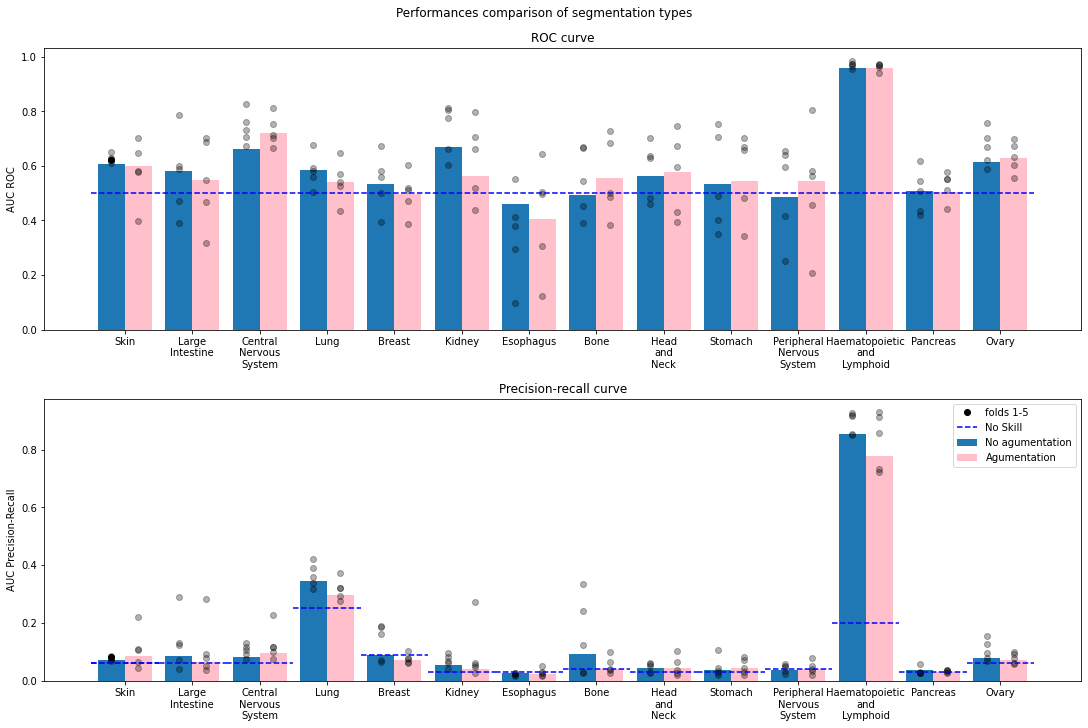

In [19]:
rotation = 0
width = 0.4
alpha = 0.3

fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(15,10), constrained_layout=True,)

_ = fig.suptitle(f'Performances comparison of segmentation types')

_ = ax1.set_title('ROC curve')
# _ = ax1.set_xlabel('Tissue')
_ = ax1.set_ylabel('AUC ROC')

_ = ax1.bar(x_pos2, y_roc_no_aug, width=width, label="No agumentation")
_ = ax1.plot(x_pos2, dots_roc_no_aug, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax1.bar(x_pos1, y_roc_norm, width=width, label="Agumentation", color= 'pink')
_ = ax1.plot(x_pos1, dots_roc_norm, linestyle='none', marker='o', color='black', alpha=alpha)



_ = ax1.plot(x_pos2[0], dots_roc_no_aug[0][0], linestyle='none', marker='o', color='black', label="folds 1-5")

_ = ax1.plot([min(x_pos)-0.5, max(x_pos)+0.5], [0.5, 0.5], label = 'No Skill', linestyle='--', color = 'blue')
_ = ax1.set_xticks(x_pos)
_ = ax1.set_xticklabels(labels_formatted, rotation=rotation)
# _ = ax1.legend()



_ = ax2.set_title('Precision-recall curve')
# _ = ax2.set_xlabel('Tissue')
_ = ax2.set_ylabel('AUC Precision-Recall')

_ = ax2.bar(x_pos2, y_pr_no_aug, width=width, label="No agumentation")
_ = ax2.plot(x_pos2, dots_pr_no_aug, linestyle='none', marker='o', color='black', alpha=alpha)

_ = ax2.bar(x_pos1, y_pr_norm, width=width, label="Agumentation", color= 'pink')
_ = ax2.plot(x_pos1, dots_pr_norm, linestyle='none', marker='o', color='black', alpha=alpha)



_ = ax2.plot(x_pos2[0], dots_pr_no_aug[0][0], linestyle='none', marker='o', color='black', label="folds 1-5")

for i in range(len(x_pos)):
    _ = ax2.plot([x_pos[i]-0.5,x_pos[i]+0.5],[prop2[i],prop2[i]], linestyle='--', color = 'blue')
    
_ = ax2.plot([x_pos[0]-0.5,x_pos[0]+0.5],[prop2[0],prop2[0]], label = 'No Skill', linestyle='--', color = 'blue')
_ = ax2.set_xticks(x_pos)
_ = ax2.set_xticklabels(labels_formatted, rotation=rotation)
_ = ax2.legend()


plt.savefig(f'Performances_comparison_augmentation_vs_not.png')